Examine "glitches" in read out

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
from tqdm.notebook import trange, tqdm

soc = TopSoc()

  mkids.py AxisChSelPfbV2.ch2tran:  ch, ntran, addr, bit [0] [0] [0] [0]


In [2]:

scan = Scan.Scan(soc)
fMixer = soc.fsIn/2/2
scan.soc.set_mixer(fMixer)

1024.0

In [3]:
f0 = fMixer + 1.4
outCh = scan.soc.outFreq2ch(f0)
fCenter = scan.soc.outCh2FreqCenter(outCh)
print(fCenter)
fStart = fCenter-soc.fcOut/2
fEnd = fCenter+soc.fcOut/2
print(fStart,fEnd)


1026.0
1025.0 1027.0


In [4]:
# Setup tones
nTones = 10
freqs = []
for i in range(nTones):
    freqs.append(fCenter+i*soc.fcOut)
freqs = np.array(freqs)
freqs += 0.1 + 0.01*np.arange(nTones)

amps = 0.9*np.ones(len(freqs))/len(freqs)
fis = 1+(0.1*np.arange(len(freqs)))
scan.setTones(freqs, amps, fis)
decimation = 2
scan.prepRead(decimation)

nt = 1
nsamp = 2000
truncate = 1000
x = scan.readAndUnpack(nt=nt, nsamp=nsamp,unpackVerbose=True)

print(x.shape)

in Scan.py prepRead:  self.toneFreqs= [1026.09997559 1028.10998535 1030.11999512 1032.13000488 1034.14001465
 1036.15002441 1038.15997314 1040.16998291 1042.17999268 1044.19000244]
  mkids.py AxisChSelPfbV2.ch2tran:  ch, ntran, addr, bit [ 4  8 12 16 20 24 28 32 36 40] [0 1 1 2 2 3 3 4 4 5] [0 0 0 0 0 0 0 0 0 0] [0 1 1 2 2 3 3 4 4 5]
nt = 1
nsamp = 333
num_tran = 6
nTones = 10
nStreams = 2
nGoodSamp = 295
                     i16s (nt*num_tran*nsamp): (2000,)
              packets (nt,num_tran*nsamp, 17): (1, 2000, 17)
          data_iq_all (nt*num_tran*nsamp, 16): (2000, 16)
             data_iq (nGoodSamp*num_tran, 16): (1770, 16)
   x_buf_2 (nStreams, nGoodsamp, num_tran, 2): (2, 295, 6, 2)
    x_buf_1 (nStreams, nGoodsamp*num_tran, 2): (2, 1770, 2)
              x_buf (nTones, nGoodsamp*nt, 2): (10, 295, 2)
                    xs (nTones, nGoodsamp*nt): (10, 295)
     tran_idx = [0 1 1 2 2 3 3 4 4 5]
   stream_idx = [1 0 1 0 1 0 1 0 1 0]
 begin*2 i16s = [0 0 0 0 0 0 0 0 0 0 0 0]
(1

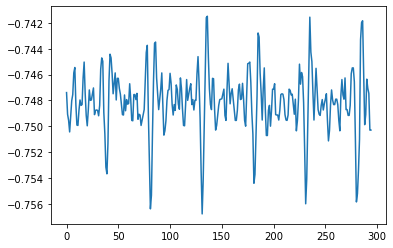

In [5]:
plt.plot(np.angle(x[0,:]))

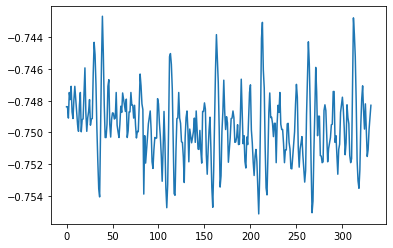

In [6]:
x = scan.readAndUnpack(nt=nt, nsamp=nsamp)
plt.plot(np.angle(x[0,:]))

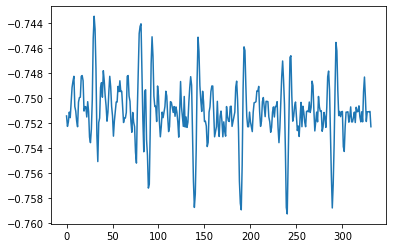

In [7]:
x = scan.readAndUnpack(nt=nt, nsamp=nsamp)
plt.plot(np.angle(x[0,:]))

nt = 1
nsamp = 333
num_tran = 6
nTones = 10
nStreams = 2
nGoodSamp = 332
                     i16s (nt*num_tran*nsamp): (2000,)
              packets (nt,num_tran*nsamp, 17): (1, 2000, 17)
          data_iq_all (nt*num_tran*nsamp, 16): (2000, 16)
             data_iq (nGoodSamp*num_tran, 16): (1992, 16)
   x_buf_2 (nStreams, nGoodsamp, num_tran, 2): (2, 332, 6, 2)
    x_buf_1 (nStreams, nGoodsamp*num_tran, 2): (2, 1992, 2)
              x_buf (nTones, nGoodsamp*nt, 2): (10, 332, 2)
                    xs (nTones, nGoodsamp*nt): (10, 332)
     tran_idx = [0 1 1 2 2 3 3 4 4 5]
   stream_idx = [1 0 1 0 1 0 1 0 1 0]
 begin*2 i16s = [2 3 4 5 0 1 2 3 4 5 0 1]


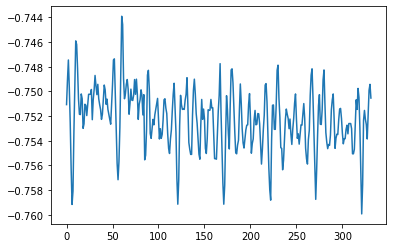

In [8]:
x = scan.readAndUnpack(nt=nt, nsamp=nsamp, unpackVerbose=True)
plt.plot(np.angle(x[0,:]))

In [12]:
packetss = []
nGoodSamps = []
nToDo = 1000
xs = np.zeros((nToDo,nTones), dtype=complex)
for i in trange(nToDo):
    x = scan.readAndUnpack(nt=nt, nsamp=nsamp,unpackVerbose=False,mean=True)
    packetss.append(scan.soc.stream.packets)
    nGoodSamps.append(scan.p.nGoodSamp)
    xs[i,:] = x

  0%|          | 0/1000 [00:00<?, ?it/s]

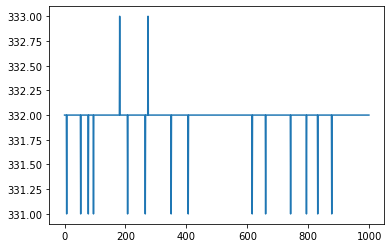

In [13]:
plt.plot(nGoodSamps)

In [14]:
amps = np.abs(xs)
fis = np.angle(xs)
print(amps.shape)

(1000, 10)


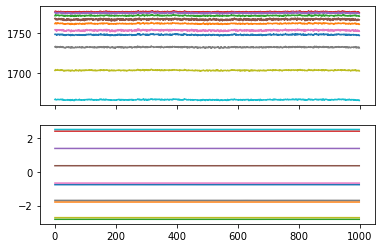

In [15]:
fig,ax = plt.subplots(2,1,sharex=True)
for iTone in range(nTones):
    ax[0].plot(amps[:,iTone])
    ax[1].plot(fis[:,iTone])
